In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import calmap

files = [i for i in glob.glob('../Dataset/2020-2023/*.{}'.format('csv'))]
files.remove('../Dataset/2020-2023/JP_youtube_trending_data.csv')
files.remove('../Dataset/2020-2023/KR_youtube_trending_data.csv')
files.remove('../Dataset/2020-2023/MX_youtube_trending_data.csv')
files.remove('../Dataset/2020-2023/RU_youtube_trending_data.csv')
sorted(files)

others = ['../Dataset/2020-2023/JP_youtube_trending_data.csv', 
          '../Dataset/2020-2023/KR_youtube_trending_data.csv',
          '../Dataset/2020-2023/MX_youtube_trending_data.csv',
          '../Dataset/2020-2023/RU_youtube_trending_data.csv']

dfs = list()
for csv in files:
    df = pd.read_csv(csv, index_col='video_id')
    df['country'] = csv[21:23]
    dfs.append(df)

for csv in others:
    df = pd.read_csv(csv, index_col='video_id', encoding="ISO-8859-1")
    df['country'] = csv[21:23]
    dfs.append(df)

my_df = pd.concat(dfs)

my_df['trending_date']=pd.to_datetime(my_df['trending_date'],format='%Y-%m-%dT%H:%M:%SZ')
my_df['publishedAt']=pd.to_datetime(my_df['publishedAt'],format='%Y-%m-%dT%H:%M:%SZ')

my_df = my_df[my_df['trending_date'].notnull()]
my_df = my_df[my_df['publishedAt'].notnull()]

my_df = my_df.dropna(how='any',inplace=False, axis = 0)

my_df.insert(4, 'publish_date', my_df['publishedAt'].dt.date)
my_df['publishedAt'] = my_df['publishedAt'].dt.time

my_df_full = my_df.reset_index().sort_values('trending_date').set_index('video_id')
my_df = my_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
my_df.head()

,title,publishedAt,channelId,channelTitle,publish_date,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
video_id,,,,,,,,,,,,,,,,,
n7C3aXBzM7s,நண்பா Mahesh Babu உனக்காக இது | Vijay VS Mahes...,13:20:54,UC9-od3vuwuVSFQF1CizTD7w,Little Talks,2020-08-11,24,2020-08-12,little talks|kollywood news|tamil cinema news|...,441390,19862,483,1288,https://i.ytimg.com/vi/n7C3aXBzM7s/default.jpg,False,False,#Vijay #MaheshBabu #MasterGreen India challeng...,IN
lT6HV0Iweyo,कृष्ण जन्माष्टमी विशेष कीर्तन ! समाधान महाराज ...,11:30:09,UCTW7-0x11i8y0vJKWcMr2vQ,Marathi Tadka,2020-08-11,24,2020-08-12,Marathi Tadka|मराठी तड़का|Marathi Tadka Videos|...,60749,477,80,18,https://i.ytimg.com/vi/lT6HV0Iweyo/default.jpg,False,False,किर्तनकार : समाधान महाराज शर्मा आपल्याला हि आप...,IN
M91gKrhW8tY,Por que a ÁGUA sai BRANCA da torneira? #Aprend...,14:30:06,UCKHhA5hN2UohhFDfNXB_cvQ,Manual do Mundo,2020-08-08,28,2020-08-12,como fazer|como funciona|experiência|teste|ciê...,429257,79918,494,4806,https://i.ytimg.com/vi/M91gKrhW8tY/default.jpg,False,False,"Você está com muita sede, corre para tomar um ...",BR
efBoqfN2aWs,JÁ FIQUEI COM YOUTUBERS? - QUEM ME CONHECE MEL...,23:53:57,UCcBfPvc-87sAEyA7yqHG4wg,LOUD Mii,2020-08-07,24,2020-08-12,miiedb|mii esquierdo|loud|loud mii|Loud Mob|Lo...,284510,65009,345,1753,https://i.ytimg.com/vi/efBoqfN2aWs/default.jpg,False,False,Não esquece de deixar o like e de compartilhar...,BR
trC97FklM7o,ಆರೋಗ್ಯಕರವಾದ ಅವಲಕ್ಕಿ ಕೇಸರಿಬಾತ್ ಒಮ್ಮೆ ಮಾಡಿದರೆ ಸಾ...,08:33:02,UC4_P12WMPUsZBzb-7eMRO_A,Kavya's cooking channel,2020-08-09,22,2020-08-12,[None],268654,4419,199,74,https://i.ytimg.com/vi/trC97FklM7o/default.jpg,False,False,#ಅವಲಕ್ಕಿಕೇಸರಿಬಾತು#Pohakesari#avalkesari#kavyas...,IN


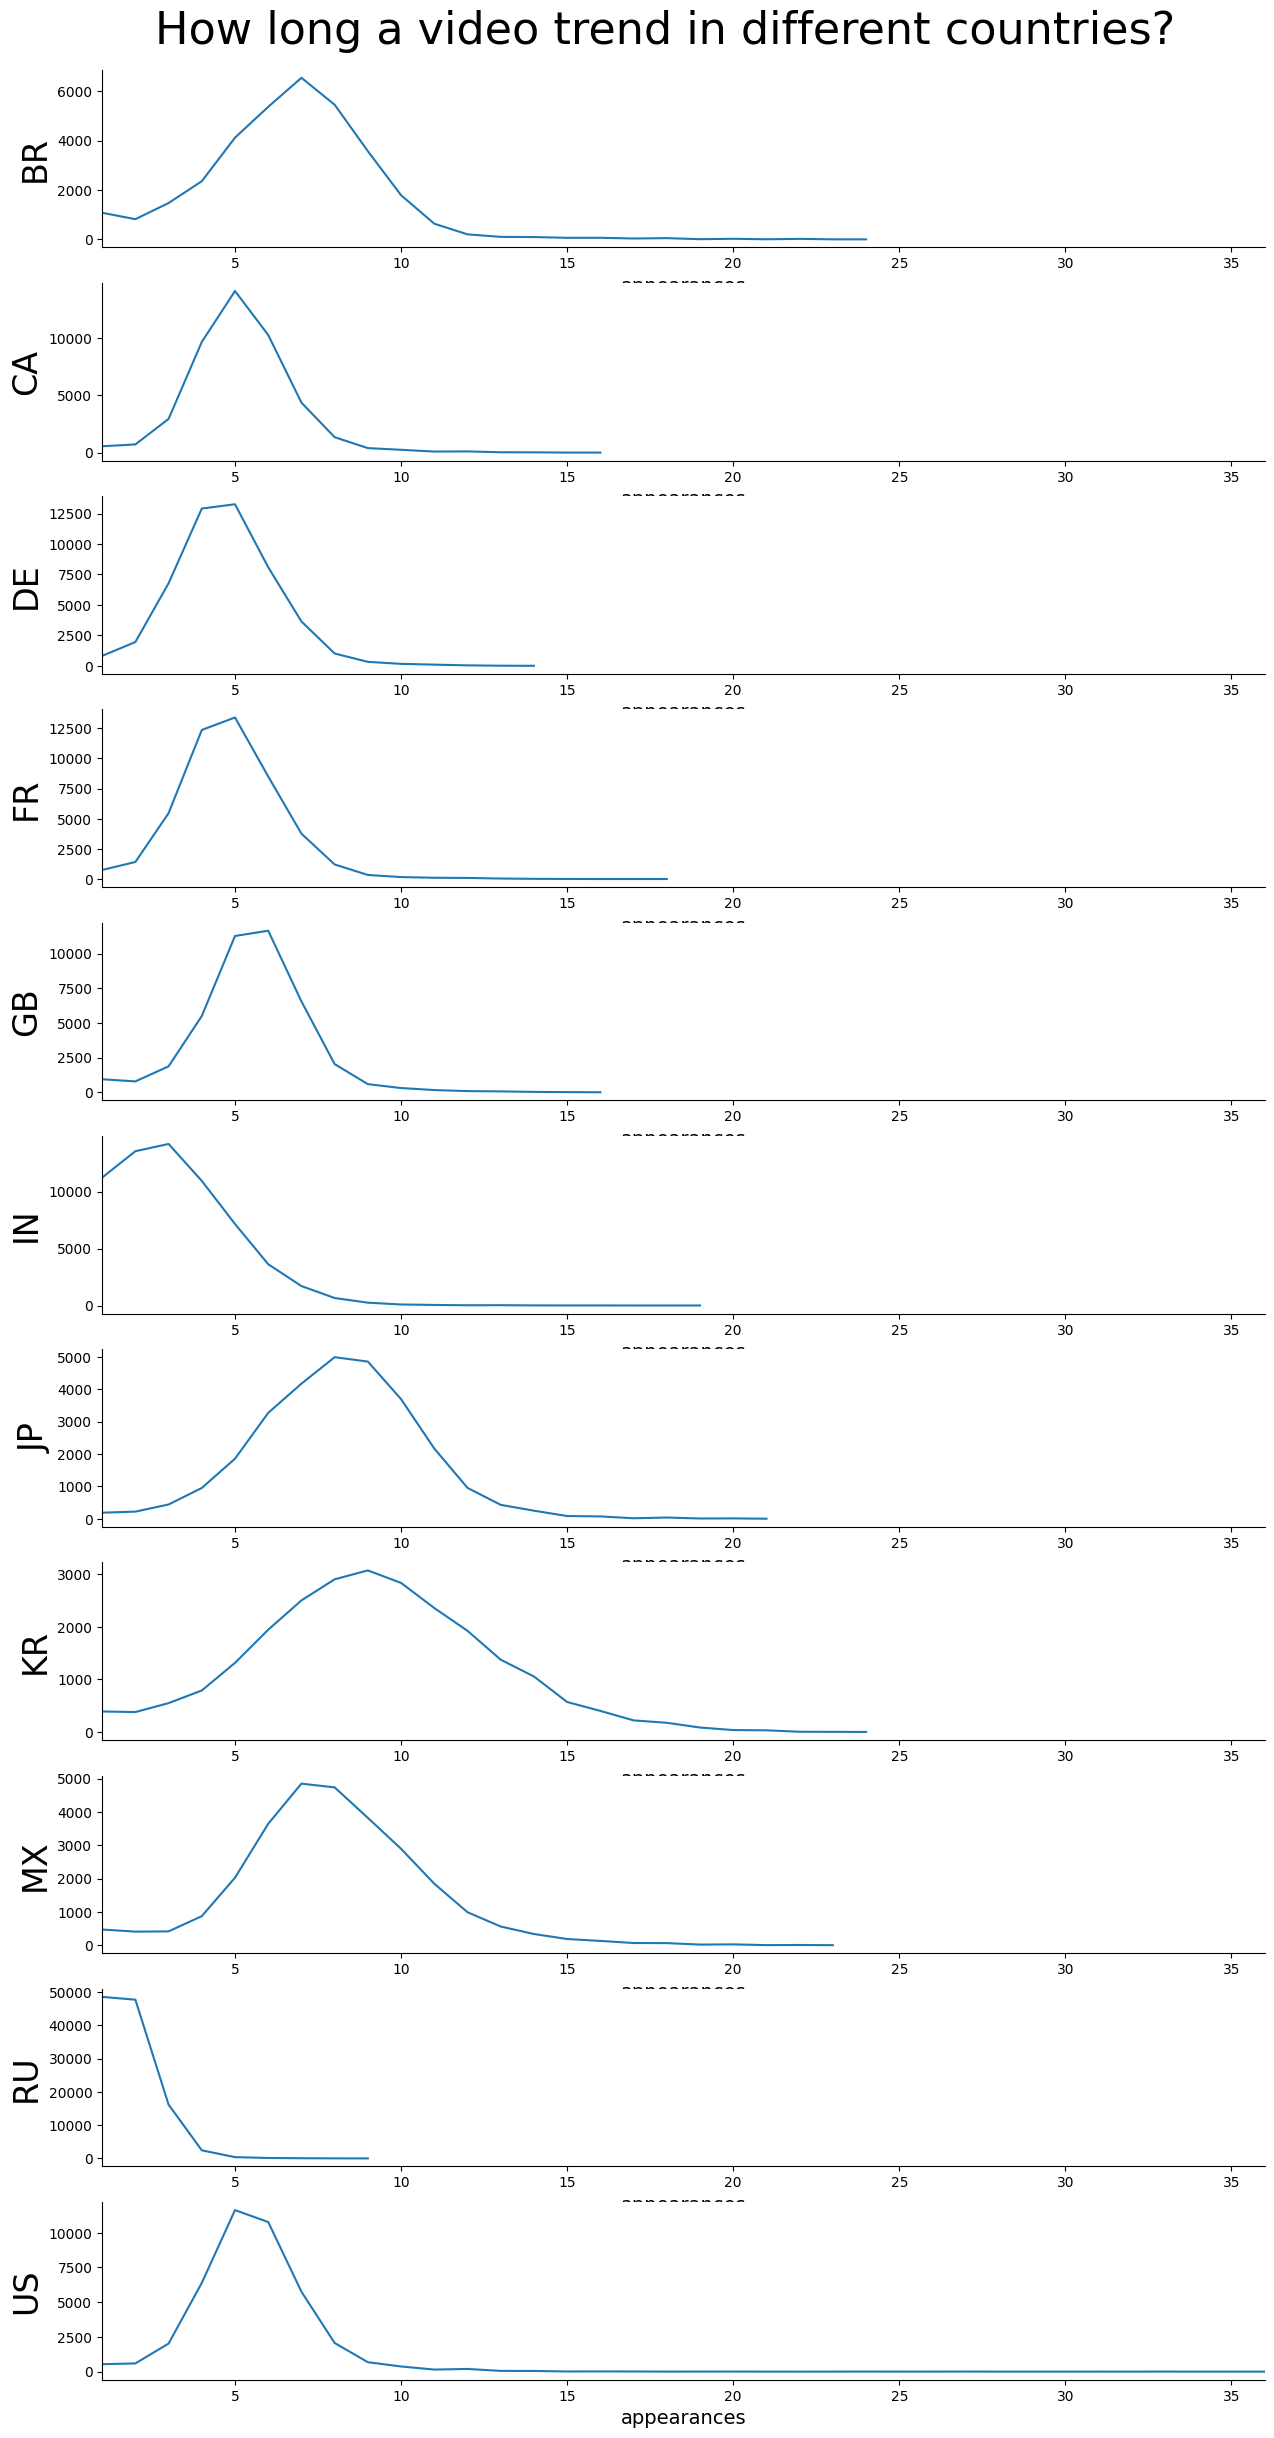

In [5]:
fre_df = pd.DataFrame(my_df_full.groupby([my_df_full.index,'country']).count()['title'].sort_values(ascending=False)).reset_index()
fre_df.head(), fre_df.tail()

video_list,max_list = list(),list()
country_list = my_df.groupby(['country']).count().index

for c in country_list:
    video_list.append(fre_df[fre_df['country']==c]['title'].value_counts().sort_index())
    max_list.append(max(fre_df[fre_df['country']==c]['title'].value_counts().sort_index().index))
    
fig, [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10] = plt.subplots(nrows=11,figsize=(15, 30))
st = fig.suptitle("How long a video trend in different countries?", fontsize=32)
st.set_y(0.9)
for i, pt in enumerate([ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
    pt.plot(video_list[i].index, video_list[i])
    pt.spines['right'].set_visible(False)
    pt.spines['top'].set_visible(False)
    pt.set_xlabel("appearances",fontsize=14)
    pt.set_ylabel(country_list[i],fontsize=24)
    pt.axes.set_xlim(1, max(max_list))

plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0)